# Import Library

In [1]:
import id_aldo
import requests
import datetime
import id_beritagar as indo
from pprint import pprint
from bs4 import BeautifulSoup
from tqdm import tqdm, tqdm_notebook
from textacy.preprocess import  preprocess_text

# Set Default Variable

In [2]:
# Set Datetime
now = datetime.date.today()

# Get Data with Scrapping Method
## Data From Tempo.co

In [2]:
url = '''https://www.tempo.co/indeks/2019/11/18/tekno'''
response = requests.get(url).text
soup = BeautifulSoup(response, "html5lib")

In [3]:
# Get Content
contents = soup.select('.list.list-type-1 > ul > li')

### Result of Contents

In [4]:
contents

[<li>
 					 <div class="card card-type-1">
 						 <div class="wrapper clearfix">
 							 <a class="col" href="https://tekno.tempo.co/read/1273550/kisah-jet-tempur-canggih-as-xf-103-yang-layu-sebelum-terbang">
 								 <img src="https://statik.tempo.co/data/2019/11/18/id_890232/890232_400.jpg"/>
 							 </a>
 							 <a class="col" href="https://tekno.tempo.co/read/1273550/kisah-jet-tempur-canggih-as-xf-103-yang-layu-sebelum-terbang">
 								 <h2 class="title">Kisah Jet Tempur Canggih AS XF-103, yang Layu sebelum Terbang</h2>
 								 <p>Amerika Serikat pernah nyaris memiliki jet tempur canggih XF-103 yang desainnyamirip dengan roket dan rudal penjelajah.</p>
 								 <span class="col">18 November 2019 13:07 WIB</span>
 							 </a>
 						 </div>
 					 </div>
 				 </li>, <li>
 					 <div class="card card-type-1">
 						 <div class="wrapper clearfix">
 							 <a class="col" href="https://tekno.tempo.co/read/1273553/belum-dirilis-vivo-s1-pro-sudah-bisa-dipesan">
 								 <i

### Clean HTML

In [5]:
# Save the Data Into List with Json Format
data = []
for content in tqdm(contents):
    urlTempo = content.select_one('a')['href']
    categoryTempo = url.split('/')[7]
    titleTempo = content.select_one('.title').text
    dateTempo = url.split('/')[6] + '-' + url.split('/')[5] + '-' + url.split('/')[4]
    
    json = {
        'category': categoryTempo,
        'title': titleTempo,
        'description': '',
        'url': urlTempo,
        'content': '',
        'img': '',
        'subCategory': '',
        'publishedAt': dateTempo,
        'source': 'tempo.co',
        'cleanContent': ''
    }
    
    data.append(json)

100%|██████████| 12/12 [00:00<00:00, 2736.01it/s]


### Result

In [6]:
print('Total Artikel : {}'.format(len(data)))
print('================================\n')
pprint(data)

Total Artikel : 12

[{'category': 'tekno',
  'cleanContent': '',
  'content': '',
  'description': '',
  'img': '',
  'publishedAt': '18-11-2019',
  'source': 'tempo.co',
  'subCategory': '',
  'title': 'Kisah Jet Tempur Canggih AS XF-103, yang Layu sebelum Terbang',
  'url': 'https://tekno.tempo.co/read/1273550/kisah-jet-tempur-canggih-as-xf-103-yang-layu-sebelum-terbang'},
 {'category': 'tekno',
  'cleanContent': '',
  'content': '',
  'description': '',
  'img': '',
  'publishedAt': '18-11-2019',
  'source': 'tempo.co',
  'subCategory': '',
  'title': 'Belum Dirilis, Vivo S1 Pro Sudah Bisa Dipesan ',
  'url': 'https://tekno.tempo.co/read/1273553/belum-dirilis-vivo-s1-pro-sudah-bisa-dipesan'},
 {'category': 'tekno',
  'cleanContent': '',
  'content': '',
  'description': '',
  'img': '',
  'publishedAt': '18-11-2019',
  'source': 'tempo.co',
  'subCategory': '',
  'title': 'BPBD Yogya Kenalkan Mitigasi Bencana Sejak Dini dengan Tamiya',
  'url': 'https://tekno.tempo.co/read/1273473/b

## Get Content Articles

In [7]:
urlContent = data[0]['url']
responseContent = requests.get(urlContent).text
soupContent = BeautifulSoup(responseContent, "html5lib")

In [8]:
# Get Sub Category and Image
subCategory = soupContent.select('.breadcrumbs > li ')[1].text
image = soupContent.select_one('figure > a')['href']

In [9]:
articles = soupContent.select('#isi > p')

### Content of Articles

In [10]:
tempArticle = []
for article in articles: 
    print(article.text.strip() + '\n')
    tempArticle.append(article.text.strip() + '\n\n')

content = ''.join(tempArticle)

TEMPO.CO, Jakarta - Amerika Serikat pernah nyaris memiliki jet tempur canggih XF-103 yang desainnya mirip dengan roket dan rudal penjelajah. Pesawat itu didesain untuk mencegat pesawat supersonik dan menghancurkan pembom nuklir milik Rusia.

Sebelumnya, AS memiliki pesawat tempur yang ada seperti F-86 Sabre, tapi dianggap terlalu lambat untuk memenuhi ancaman itu. Sehingga pada 1949, Angkatan Udara AS mengajukan permintaan untuk pesawat terbaru, demikian dilaporkan laman National Interest, beberapa waktu lalu.

Menunjuk proyek Interceptor 1954 untuk menandai masuknya layanan, Angkatan Udara menerima sembilan proposal, di mana tiga dipilih untuk pengembangan pendahuluan. Convair dengan desain yang kemudian menjadi F-102 Delta Dagger, Lockheed dengan pesawat yang kemudian menjadi F-104 Starfighter, dan Republic Aircraft dengan AP-57, kemudian berganti nama menjadi XF-103.

Dari tiga desain, XF-103 adalah yang paling canggih dan diusulkan sebagai pesawat yang bisa terbang 2.600 mil per ja

### Insert Article Into Data

In [11]:
temp = []
temp = data[0]

In [12]:
temp['img'] = image
temp['subCategory'] = subCategory
temp['content'] = content

### Result

In [13]:
pprint(temp)

{'category': 'tekno',
 'cleanContent': '',
 'content': 'TEMPO.CO, Jakarta - Amerika Serikat pernah nyaris memiliki jet '
            'tempur canggih XF-103 yang desainnya mirip dengan roket dan rudal '
            'penjelajah. Pesawat itu didesain untuk mencegat pesawat '
            'supersonik dan menghancurkan pembom nuklir milik Rusia.\n'
            '\n'
            'Sebelumnya, AS memiliki pesawat tempur yang ada seperti F-86 '
            'Sabre, tapi dianggap terlalu lambat untuk memenuhi ancaman itu. '
            'Sehingga pada 1949, Angkatan Udara AS mengajukan permintaan untuk '
            'pesawat terbaru, demikian dilaporkan laman\xa0National Interest, '
            'beberapa waktu lalu.\n'
            '\n'
            'Menunjuk proyek Interceptor 1954 untuk menandai masuknya layanan, '
            'Angkatan Udara menerima sembilan proposal, di mana tiga dipilih '
            'untuk pengembangan pendahuluan. Convair dengan desain yang '
            'kemudian menjadi F-10

# Preprocessing

In [14]:
import spacy
from spacy import displacy

In [15]:
nlp = id_aldo.load()

In [16]:
def formatArticle(text=None):
    doc = nlp(text)
    count = 0
    for ent in doc.ents:
        if ent.end <= 5:
            count = ent.end_char + 1
        else:
            count = len(text)

    result = text[count:].strip()

    return result

### Delete Format Publisher

In [17]:
doc = nlp(temp['content'])

In [18]:
displacy.render(doc, jupyter=True, style='ent')

### Result

In [19]:
result = formatArticle(temp['content'])
print(result)

Amerika Serikat pernah nyaris memiliki jet tempur canggih XF-103 yang desainnya mirip dengan roket dan rudal penjelajah. Pesawat itu didesain untuk mencegat pesawat supersonik dan menghancurkan pembom nuklir milik Rusia.

Sebelumnya, AS memiliki pesawat tempur yang ada seperti F-86 Sabre, tapi dianggap terlalu lambat untuk memenuhi ancaman itu. Sehingga pada 1949, Angkatan Udara AS mengajukan permintaan untuk pesawat terbaru, demikian dilaporkan laman National Interest, beberapa waktu lalu.

Menunjuk proyek Interceptor 1954 untuk menandai masuknya layanan, Angkatan Udara menerima sembilan proposal, di mana tiga dipilih untuk pengembangan pendahuluan. Convair dengan desain yang kemudian menjadi F-102 Delta Dagger, Lockheed dengan pesawat yang kemudian menjadi F-104 Starfighter, dan Republic Aircraft dengan AP-57, kemudian berganti nama menjadi XF-103.

Dari tiga desain, XF-103 adalah yang paling canggih dan diusulkan sebagai pesawat yang bisa terbang 2.600 mil per jam, lebih cepat dari 

## Preprocessing
### Case Folding 

In [20]:
cf = []
formatCF = ['number', 'email', 'usd', 'url']
lowerCase = preprocess_text(result,
                            fix_unicode=True, 
                            lowercase=True, 
                            no_urls=True,
                            no_emails=True,
                            no_phone_numbers=True,
                            no_numbers=True,
                            no_currency_symbols=True,
                            no_punct=True)
caseFolding = lowerCase.split()
[cf.append(case) for case in caseFolding if case not in formatCF]
caseFolding = ' '.join(cf)

print(caseFolding)

amerika serikat pernah nyaris memiliki jet tempur canggih xf yang desainnya mirip dengan roket dan rudal penjelajah pesawat itu didesain untuk mencegat pesawat supersonik dan menghancurkan pembom nuklir milik rusia sebelumnya as memiliki pesawat tempur yang ada seperti f sabre tapi dianggap terlalu lambat untuk memenuhi ancaman itu sehingga pada angkatan udara as mengajukan permintaan untuk pesawat terbaru demikian dilaporkan laman national interest beberapa waktu lalu menunjuk proyek interceptor untuk menandai masuknya layanan angkatan udara menerima sembilan proposal di mana tiga dipilih untuk pengembangan pendahuluan convair dengan desain yang kemudian menjadi f delta dagger lockheed dengan pesawat yang kemudian menjadi f starfighter dan republic aircraft dengan ap kemudian berganti nama menjadi xf dari tiga desain xf adalah yang paling canggih dan diusulkan sebagai pesawat yang bisa terbang mil per jam lebih cepat dari tiga kali kecepatan suara ke ketinggian kaki pada awal an ketik

## Preprocessing
### Tokenization 

In [22]:
import nltk

In [25]:
tokens = nltk.tokenize.word_tokenize(caseFolding)
print(tokens)

['amerika', 'serikat', 'pernah', 'nyaris', 'memiliki', 'jet', 'tempur', 'canggih', 'xf', 'yang', 'desainnya', 'mirip', 'dengan', 'roket', 'dan', 'rudal', 'penjelajah', 'pesawat', 'itu', 'didesain', 'untuk', 'mencegat', 'pesawat', 'supersonik', 'dan', 'menghancurkan', 'pembom', 'nuklir', 'milik', 'rusia', 'sebelumnya', 'as', 'memiliki', 'pesawat', 'tempur', 'yang', 'ada', 'seperti', 'f', 'sabre', 'tapi', 'dianggap', 'terlalu', 'lambat', 'untuk', 'memenuhi', 'ancaman', 'itu', 'sehingga', 'pada', 'angkatan', 'udara', 'as', 'mengajukan', 'permintaan', 'untuk', 'pesawat', 'terbaru', 'demikian', 'dilaporkan', 'laman', 'national', 'interest', 'beberapa', 'waktu', 'lalu', 'menunjuk', 'proyek', 'interceptor', 'untuk', 'menandai', 'masuknya', 'layanan', 'angkatan', 'udara', 'menerima', 'sembilan', 'proposal', 'di', 'mana', 'tiga', 'dipilih', 'untuk', 'pengembangan', 'pendahuluan', 'convair', 'dengan', 'desain', 'yang', 'kemudian', 'menjadi', 'f', 'delta', 'dagger', 'lockheed', 'dengan', 'pesawat

In [26]:
kemunculan = nltk.FreqDist(tokens)
print(kemunculan.most_common())

[('dan', 15), ('pesawat', 15), ('yang', 14), ('xf', 13), ('untuk', 11), ('udara', 11), ('dengan', 9), ('pada', 6), ('kemudian', 6), ('f', 5), ('menjadi', 5), ('kecepatan', 5), ('ke', 5), ('roket', 4), ('angkatan', 4), ('di', 4), ('tiga', 4), ('dari', 4), ('terbang', 4), ('lebih', 4), ('akan', 4), ('ramjet', 4), ('pernah', 3), ('memiliki', 3), ('tempur', 3), ('rudal', 3), ('itu', 3), ('seperti', 3), ('proyek', 3), ('sistem', 3), ('mesin', 3), ('penerbangan', 3), ('atau', 3), ('harus', 3), ('canggih', 2), ('mirip', 2), ('pembom', 2), ('rusia', 2), ('as', 2), ('terlalu', 2), ('national', 2), ('interest', 2), ('beberapa', 2), ('interceptor', 2), ('convair', 2), ('desain', 2), ('adalah', 2), ('sebagai', 2), ('bisa', 2), ('mil', 2), ('per', 2), ('jam', 2), ('cepat', 2), ('tampak', 2), ('daripada', 2), ('turbojet', 2), ('wright', 2), ('namun', 2), ('dilengkapi', 2), ('bagian', 2), ('ini', 2), ('bahwa', 2), ('sudah', 2), ('cukup', 2), ('radar', 2), ('enam', 2), ('jika', 2), ('kehilangan', 2), 

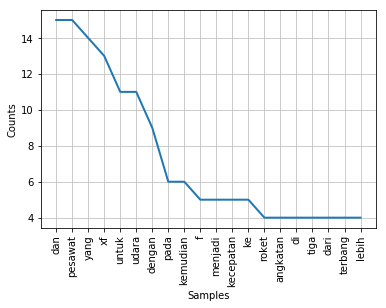

In [27]:
import matplotlib.pyplot as plt
kemunculan.plot(20,cumulative=False)
plt.show()

## Preprocessing
### Filtering (Stopword Removal)

In [28]:
stopwords = requests.get("https://raw.githubusercontent.com/masdevid/ID-Stopwords/master/id.stopwords.02.01.2016.txt").text.split("\n")

In [32]:
text_stopword = []
words = caseFolding.split()
for word in words:
    if word not in stopwords: text_stopword.append(word)

In [33]:
resultFiltering = ' '.join(text_stopword)

### Result

In [34]:
print(resultFiltering)

amerika serikat memiliki jet tempur canggih xf desainnya roket rudal penjelajah pesawat didesain mencegat pesawat supersonik menghancurkan pembom nuklir milik rusia as memiliki pesawat tempur f sabre dianggap lambat memenuhi ancaman angkatan udara as mengajukan permintaan pesawat terbaru dilaporkan laman national interest proyek interceptor menandai masuknya layanan angkatan udara menerima sembilan proposal dipilih pengembangan pendahuluan convair desain f delta dagger lockheed pesawat f starfighter republic aircraft ap berganti nama xf desain xf canggih diusulkan pesawat terbang mil jam cepat kali kecepatan suara ketinggian kaki an subsonik f mig terbang korea kecepatan ratus mil jam xf roket pesawat terbang gambar rudal jelajah mencapai kecepatan pesawat memiliki sistem propulsi ganda mesin turbojet wright xj memberdayakan xf lepas landas penerbangan normal kecepatan ekstra menangkap kawanan pembom rusia badger bear bison xf dilengkapi mesin ramjet ramjet dasarnya menyedot udara pesa

## Preprocessing
### Stemming

In [35]:
# import StemmerFactory class
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [36]:
# stemming process
output   = stemmer.stem(resultFiltering)

print(output)

amerika serikat milik jet tempur canggih xf desain roket rudal jelajah pesawat desain cegat pesawat supersonik hancur bom nuklir milik rusia as milik pesawat tempur f sabre anggap lambat penuh ancam angkat udara as aju minta pesawat baru lapor laman national interest proyek interceptor tanda masuk layan angkat udara terima sembilan proposal pilih kembang dahulu convair desain f delta dagger lockheed pesawat f starfighter republic aircraft ap ganti nama xf desain xf canggih usul pesawat terbang mil jam cepat kali cepat suara tinggi kaki an subsonik f mig terbang korea cepat ratus mil jam xf roket pesawat terbang gambar rudal jelajah capai cepat pesawat milik sistem propulsi ganda mesin turbojet wright xj daya xf lepas landas terbang normal cepat ekstra tangkap kawan bom rusia badger bear bison xf lengkap mesin ramjet ramjet dasar sedot udara pesawat campur bahan bakar tembak campur sistem sederhana lemah pesawat terbang roket gerak cepat mach udara kompresi ramjet tel turbojet xf dorong

## Comparing

In [37]:
print('Case Folding')
print('==========================\n')
print(caseFolding)
print()

print('Stemming ')
print('==========================\n')
print(output)

Case Folding

amerika serikat pernah nyaris memiliki jet tempur canggih xf yang desainnya mirip dengan roket dan rudal penjelajah pesawat itu didesain untuk mencegat pesawat supersonik dan menghancurkan pembom nuklir milik rusia sebelumnya as memiliki pesawat tempur yang ada seperti f sabre tapi dianggap terlalu lambat untuk memenuhi ancaman itu sehingga pada angkatan udara as mengajukan permintaan untuk pesawat terbaru demikian dilaporkan laman national interest beberapa waktu lalu menunjuk proyek interceptor untuk menandai masuknya layanan angkatan udara menerima sembilan proposal di mana tiga dipilih untuk pengembangan pendahuluan convair dengan desain yang kemudian menjadi f delta dagger lockheed dengan pesawat yang kemudian menjadi f starfighter dan republic aircraft dengan ap kemudian berganti nama menjadi xf dari tiga desain xf adalah yang paling canggih dan diusulkan sebagai pesawat yang bisa terbang mil per jam lebih cepat dari tiga kali kecepatan suara ke ketinggian kaki pada